<img src="https://raw.githubusercontent.com/maverick-faus/Files/master/DeepDeamon2.png" alt="drawing" width="100px"/>
# Red BNB - Puesta en marcha
TT: Deep Deep Dishes  
Food recommendation System  
ESCOM  
By Faus - 2K18


**Instalación de biblioteca para acceso a Google Drive**

In [0]:
import tensorflow as tf
import numpy as np
import pickle 
from sklearn.metrics import confusion_matrix
from PIL import Image,ImageOps 
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
!pip install PyDrive
import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
fileIdLabelmap = '1KgchliGJ9QFqoqLmsWs0dwoRPuOtrV5v'
#label map
downloaded1 = drive.CreateFile({'id': fileIdLabelmap})
downloaded1.GetContentFile("BNB1.ckpt.data-00000-of-00001")

fileIdLabelmap = '1txXYJ41n5Z_opzuF5Gw6G2R064856lXB'
#label map
downloaded1 = drive.CreateFile({'id': fileIdLabelmap})
downloaded1.GetContentFile("BNB1.ckpt.index")

fileIdLabelmap = '1i6WuNDK4md4LdlaMgqMu-EwuL3Ea6elX'
#label map
downloaded1 = drive.CreateFile({'id': fileIdLabelmap})
downloaded1.GetContentFile("BNB1.ckpt.meta")


In [25]:
!ls

adc.json		       BNB1.ckpt.index	BNB_test.pickle  drive
BNB1.ckpt.data-00000-of-00001  BNB1.ckpt.meta	CNNClass	 sample_data


In [0]:
def deep_neural_convolutional_class(
    batch_size=20,
    image_size=[200,200],
    Drop_prob=1.0,
    learning_rate = 1e-3,
    n_nodes_hl0 = 2000,
    n_nodes_hl1 = 1000,
    n_nodes_hl2 = 500,
    n_nodes_hl3 = 100,
    n_classes=2
    ):
    
    reset_graph()
    #Place holder de entrada 
    x= tf.placeholder(tf.float32,[batch_size,image_size[0],image_size[1],3], name='placeholder_img_entrada')
  
    #Diccionario de pesos convolucionales 
    with tf.name_scope('pesos_bias') as scope1:
        weigths={"w_conv1":tf.Variable(tf.random_normal([5,5,3,32]),name='Pesos_1_32'),
                 "w_conv2":tf.Variable(tf.random_normal([5,5,32,64]),name='Pesos_1_64'),
                 "w_conv3":tf.Variable(tf.random_normal([3,3,64,128]),name='Pesos_1_128'),   
                 "w_conv4":tf.Variable(tf.random_normal([5,5,128,256]),name='Pesos_1_256'),
                }
        #Diccionario de bias
        biases={"b_conv1":tf.Variable(tf.random_normal([32]),name='Bias_1_32'),
                "b_conv2":tf.Variable(tf.random_normal([64]),name='Bias_1_64'),
                "b_conv3":tf.Variable(tf.random_normal([128]),name='Bias_1_128'),
                "b_conv4":tf.Variable(tf.random_normal([256]),name='Bias_1_256'),
               }

    #Extractor de características
    with tf.name_scope('capas_conv') as scope2:
        conv1=tf.nn.relu(conv2d(x,weigths["w_conv1"],'Capa_Conv_1','SAME')+biases["b_conv1"],name='Func_relu_1')
        conv1=tf.nn.dropout(conv1,Drop_prob)
        conv1=maxpool2d(conv1,ks=[1,2,2,1],st=[1,2,2,1])
        #imagen resultante de 100x100x32
        print(conv1)

        conv2=tf.nn.relu(conv2d(conv1,weigths["w_conv2"],'Capa_Conv_2','SAME')+biases["b_conv2"],name='Func_relu_2')
        conv2=tf.nn.dropout(conv2,Drop_prob)
        conv2=maxpool2d(conv2,ks=[1,2,2,1],st=[1,2,2,1])
        #imagen resultante de 50x50x64
        print(conv2)

        conv3=tf.nn.relu(conv2d(conv2,weigths["w_conv3"],'Capa_Conv_3','VALID')+biases["b_conv3"],name='Func_relu_3')
        conv3=tf.nn.dropout(conv3,Drop_prob)
        conv3=maxpool2d(conv3,ks=[1,2,2,1],st=[1,2,2,1])
        #imagen resultante de 24x24x128
        print(conv3)

        conv4=tf.nn.relu(conv2d(conv3,weigths["w_conv4"],'Capa_Conv_4','SAME')+biases["b_conv4"],name='Func_relu_4')
        conv4=tf.nn.dropout(conv4,Drop_prob)
        conv4=maxpool2d(conv4,ks=[1,2,2,1],st=[1,2,2,1])
        #imagen resultante de 12x12x256
        print(conv4)

        #Embeding, son las caracteristicas fonales que se pasarán al MLP o red completamente conectada para clasifiacar
        embdeding=tf.reshape(conv4,[batch_size,12*12*256],name='Embeding')
        print(embdeding)
    
    #Red perceptron, declaración de capas, son diccionarios de pesos y bias.
    with tf.name_scope('capas_clasificador') as scope3:
        hidden_0_layer = {'weights':tf.Variable(tf.random_normal([12*12*256, n_nodes_hl0]),name='Capa_oculta_pesos_0'),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl0]),name='Capa_oculta_bias_0')}

        hidden_1_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl0, n_nodes_hl1]),'Capa_oculta_pesos_1'),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl1]),name='Capa_oculta_bias_1')}

        hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2]),'Capa_oculta_pesos_2'),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl2]),name='Capa_oculta_bias_2')}
        
        hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3]),'Capa_oculta_pesos_3'),
                          'biases':tf.Variable(tf.random_normal([n_nodes_hl3]),name='Capa_oculta_bias_3')}

        output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes]),'Capa_salida_pesos'),
                        'biases':tf.Variable(tf.random_normal([n_classes]),name='Capa_salida_bias'),}
    
    #W*P + B 
    with tf.name_scope('op_clasificador') as scope4:
        
        l0 = tf.add(tf.matmul(embdeding,hidden_0_layer['weights'],name='Matmul_l0'), hidden_0_layer['biases'],name='Suma_Pesos_Bias_0')
        l0 = tf.nn.relu(l0,name='l0_relu_0')

        l1 = tf.add(tf.matmul(l0,hidden_1_layer['weights'],name='Matmul_l1'), hidden_1_layer['biases'],name='Suma_Pesos_Bias_1')
        l1 = tf.nn.relu(l1,name='l1_relu_1')

        l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights'],name='Matmul_l2'), hidden_2_layer['biases'],name='Suma_Pesos_Bias_2')
        l2 = tf.nn.relu(l2,name='l2_relu_2')
        
        l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights'],name='Matmul_l3'), hidden_3_layer['biases'],name='Suma_Pesos_Bias_3')
        l3 = tf.nn.relu(l3,name='l3_relu_3')

        output = tf.matmul(l3,output_layer['weights'],name='Matmul_out') + output_layer['biases']
    
    # Declarando la funcion de costo y entrenamiento
    #Reduce mean, reduce la dimension del tensor en un promedio es decir hace el promedio del costo o error
    
    
  
    return dict(
        x = x,
        embeding=conv4,
        output=output,
        saver = tf.train.Saver()
       
    )

In [0]:
def conv2d(x, W,name,padd,strid=[1,1,1,1]):
    #El stride de esa función no reduce el tamaño de la imagen
    return tf.nn.conv2d(x, W, strides=strid, padding=padd,name=name)

def maxpool2d(x,ks,st):
    #           El st de esta función reduce la imagen a la mitad
    return tf.nn.max_pool(x, ksize=ks, strides=st, padding='SAME')

In [0]:
def reset_graph():
    #Limpiamos la gráfic
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

In [0]:
def check_net(g, test, checkpoint):
   with tf.Session() as sess:
        g['saver'].restore(sess, checkpoint)       
        feed_dict={g['x']: test.tolist()} #La arquitectura recibe una matriz,lol. (tamaño batch, ancho, alto,3) debes suministrarlo asi
        preds = sess.run([g['output']], feed_dict)
        return preds


(200, 200, 3)


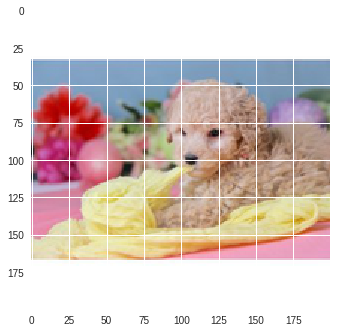

In [95]:
response = requests.get("https://raw.githubusercontent.com/maverick-faus/Files/master/dog.jpg")
img = Image.open(BytesIO(response.content))
img = img.convert('RGB')
im = img.resize((200,200),Image.ANTIALIAS)
img_data=np.array(im)
print(img_data.shape)
plt.imshow(img_data)
plt.show()

In [96]:
data0=[]
data0.append(img_data)
data1=np.array(data0)
g=deep_neural_convolutional_class(batch_size = 1)#Batch de prueba
pred=check_net(g,data1,"./BNB1.ckpt")

print(pred)
vector=pred[0][0].tolist()
print(vector.index(max(vector)))

Tensor("capas_conv/MaxPool:0", shape=(1, 100, 100, 32), dtype=float32)
Tensor("capas_conv/MaxPool_1:0", shape=(1, 50, 50, 64), dtype=float32)
Tensor("capas_conv/MaxPool_2:0", shape=(1, 24, 24, 128), dtype=float32)
Tensor("capas_conv/MaxPool_3:0", shape=(1, 12, 12, 256), dtype=float32)
Tensor("capas_conv/Embeding:0", shape=(1, 36864), dtype=float32)
INFO:tensorflow:Restoring parameters from ./BNB1.ckpt
[array([[-2.0461819e+12,  2.2561038e+12]], dtype=float32)]
1
